In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Test Signal 

In [ ]:

 t_seq=np.linspace(-20,20,2000)
 f=50

 x=np.sin(5*2*np.pi*f*t_seq)
 plt.figure(figsize=(6, 4))
 plt.subplot(2,1,1)
 plt.plot(t_seq,x)
 plt.subplot(2,1,2)
 plt.stem(t_seq,x)
 plt.show()
    


# Convolution Signal For Filtering

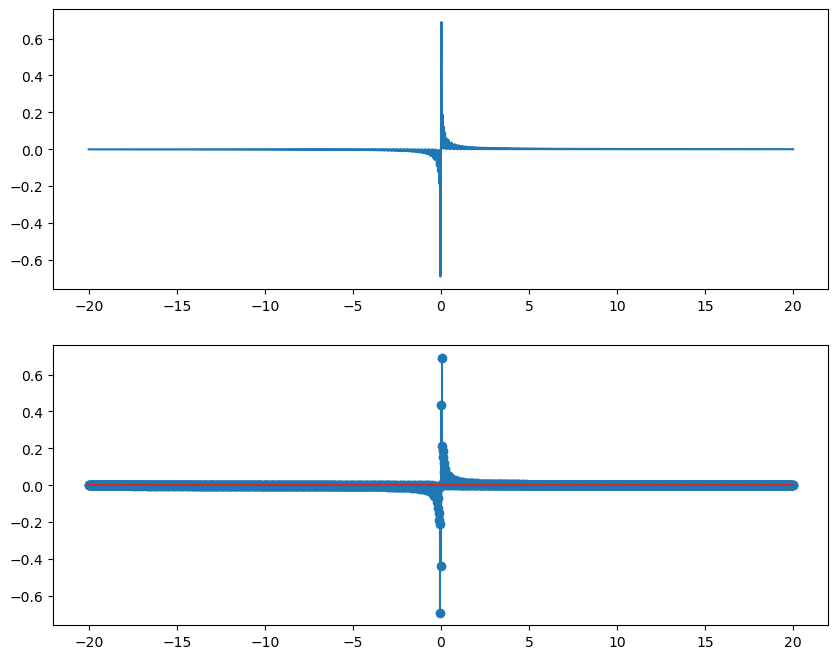

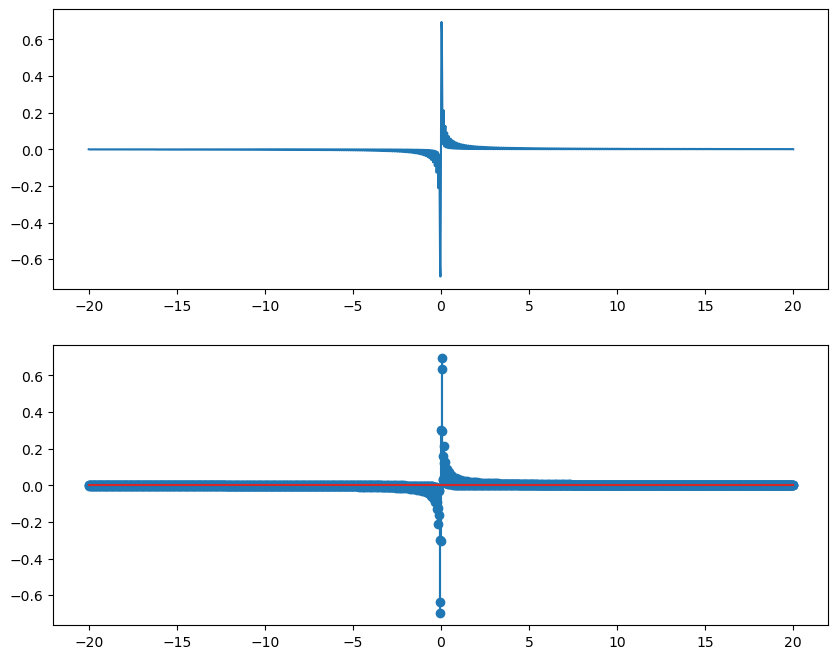

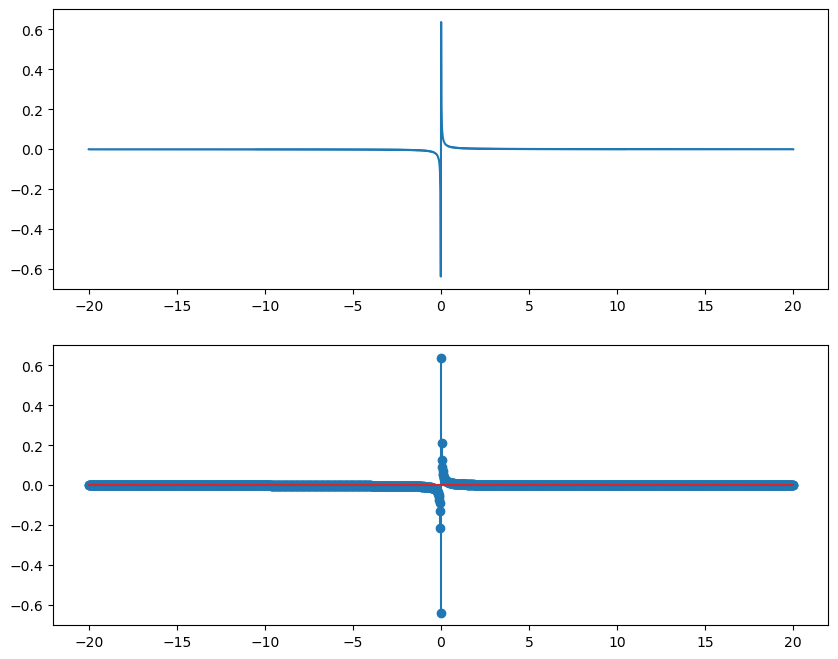

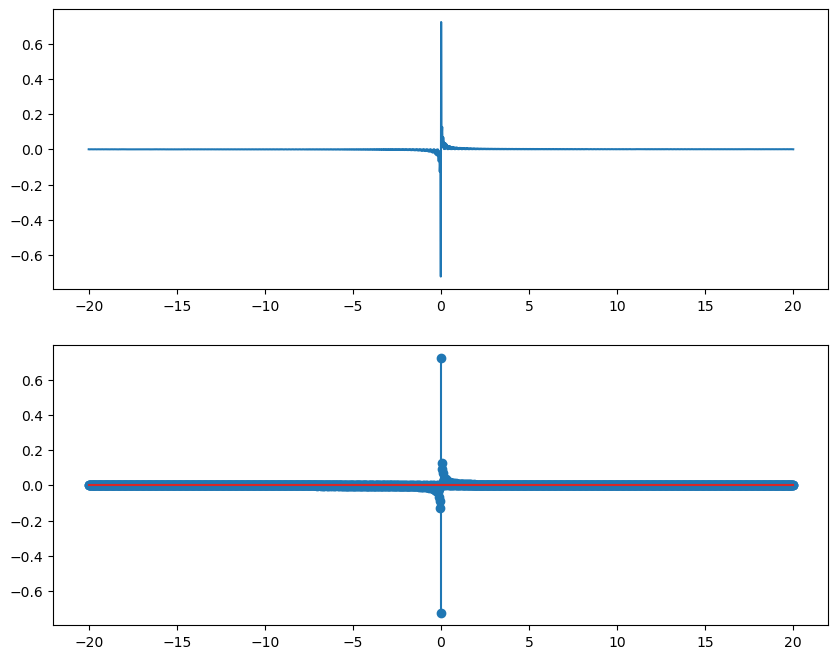

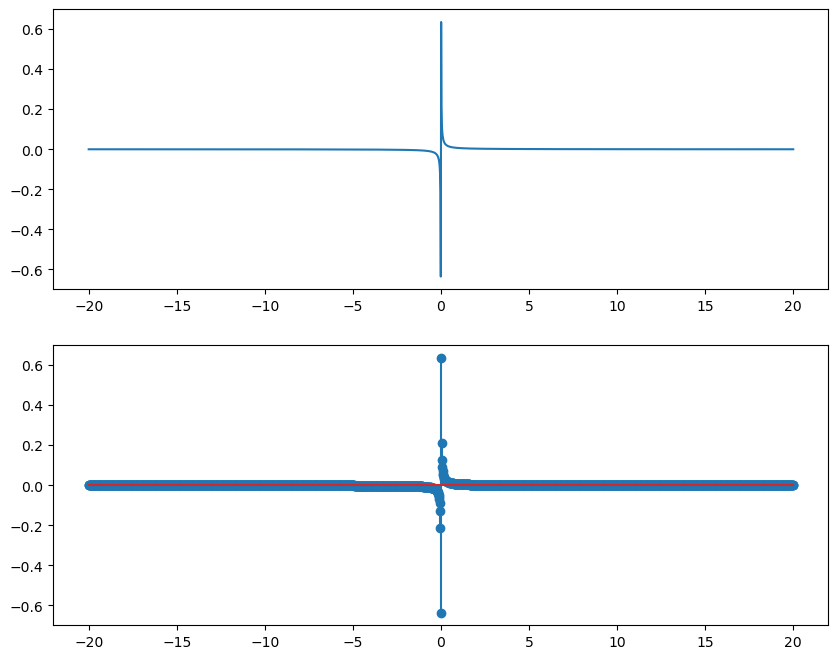

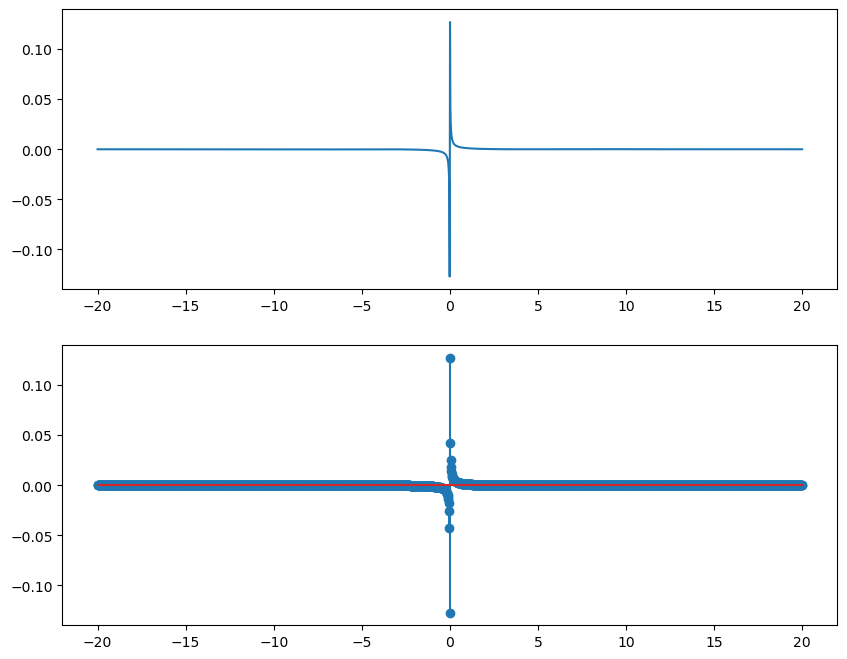

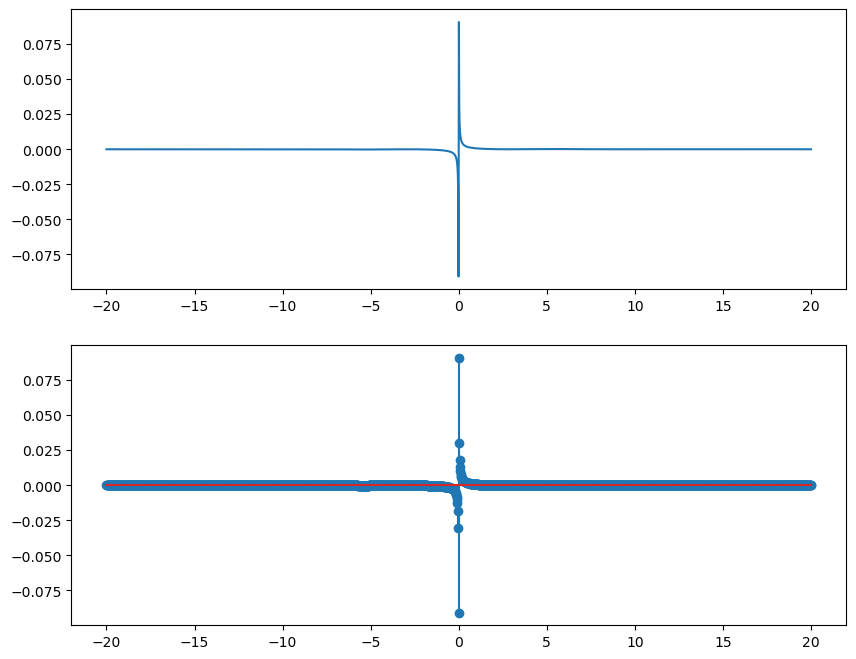

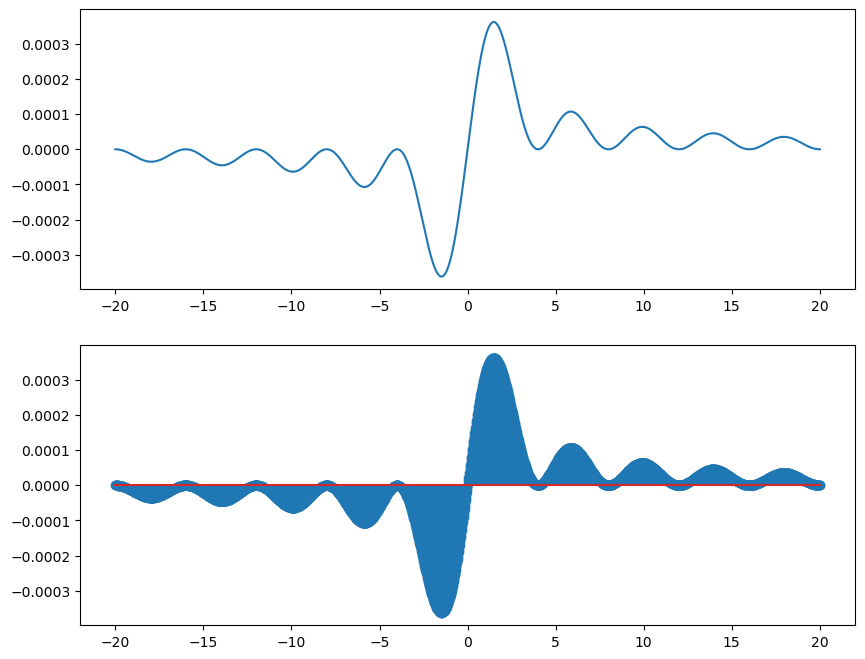

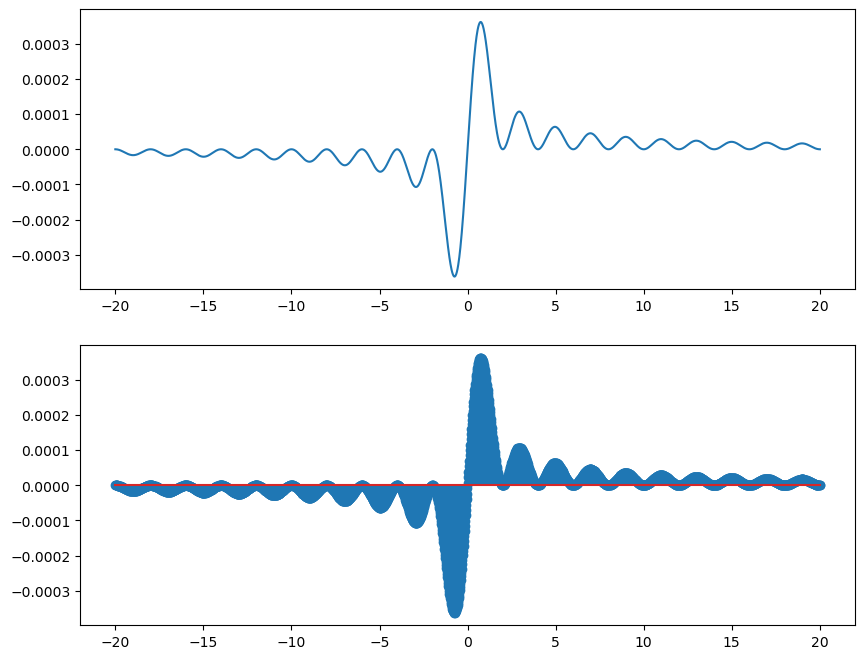

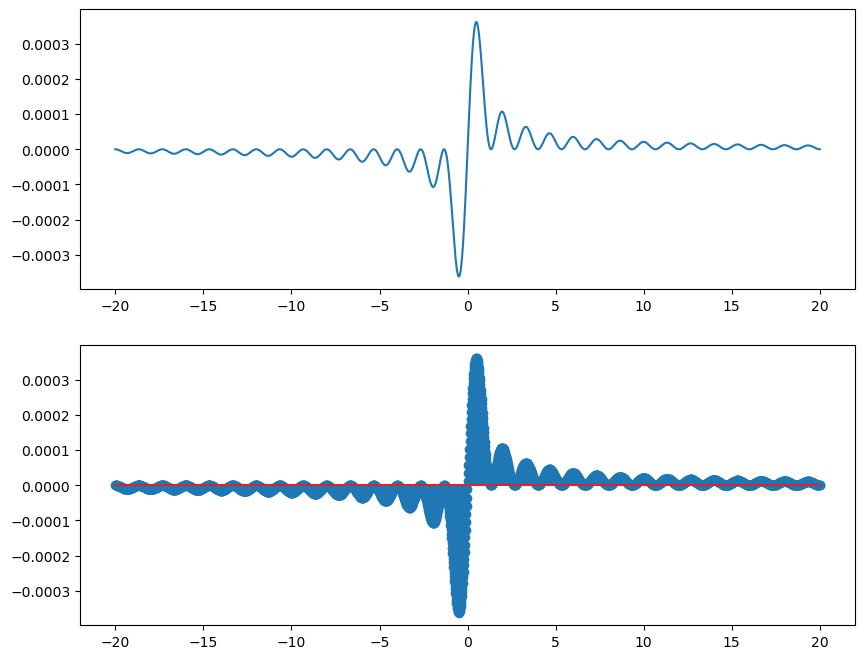

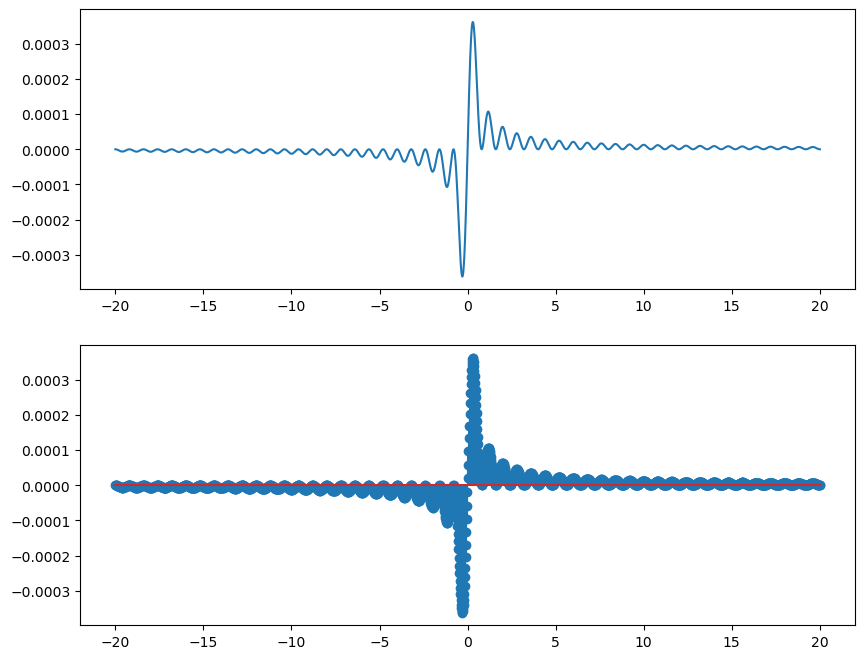

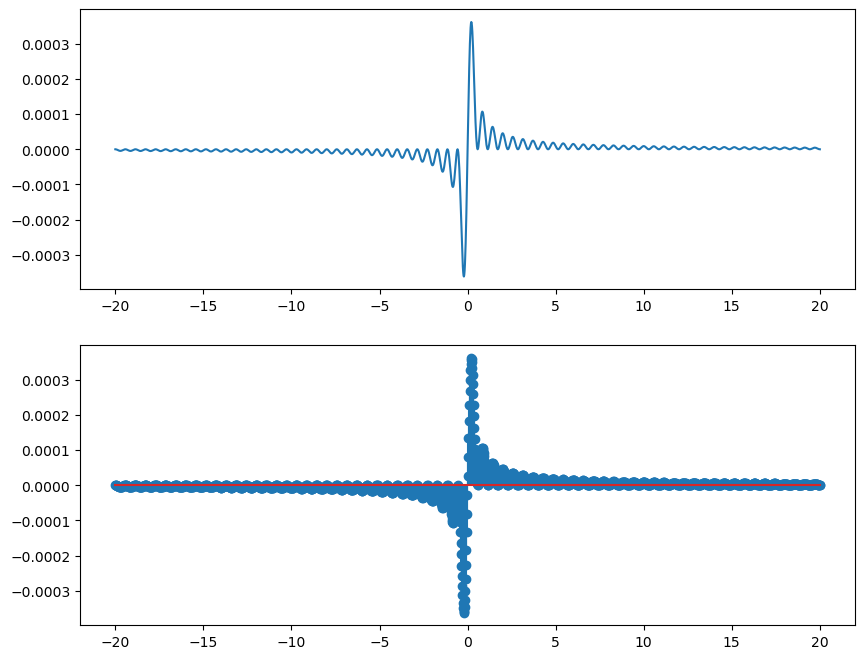

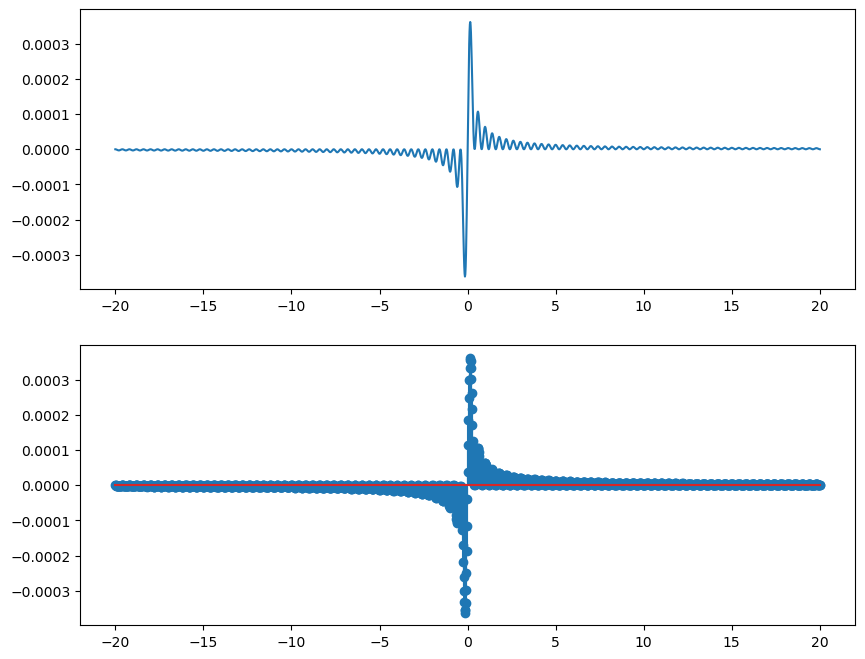

In [3]:
h=[]
t_seq2=np.linspace(-20,20,400)
f=[30,20,50,70,100,500,700,1000,2000,3000,5000,7000,10000]
for i in range(0,len(f)):    
 h.append((1-np.cos(np.pi*f[i]*t_seq))/(np.pi*f[i]*t_seq))
 plt.figure(figsize=(10, 8))
 plt.subplot(2,1,1)
 plt.plot(t_seq,h[i])
 plt.subplot(2,1,2)
 plt.stem(t_seq,h[i])
 plt.show()


# Testing The Filtering with different Frequecies

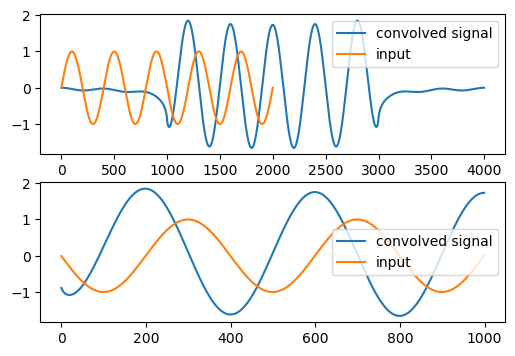

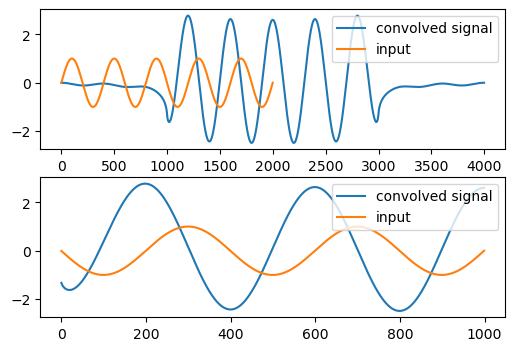

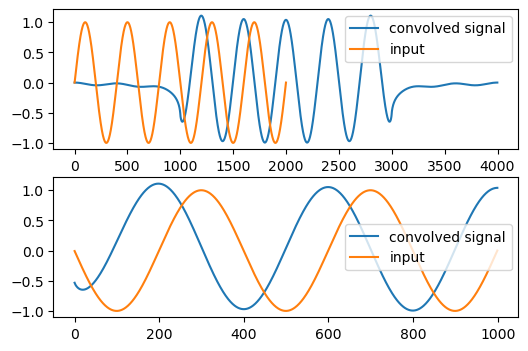

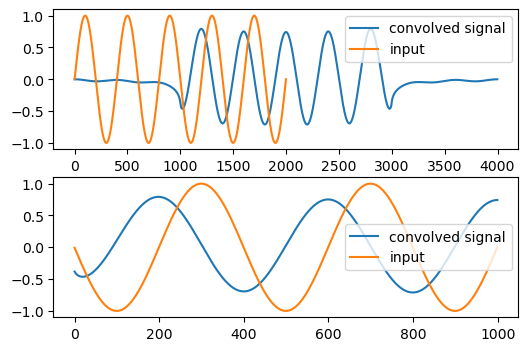

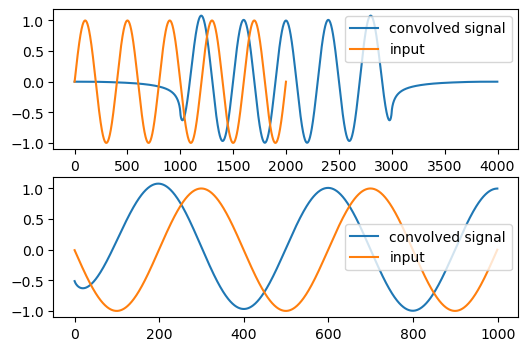

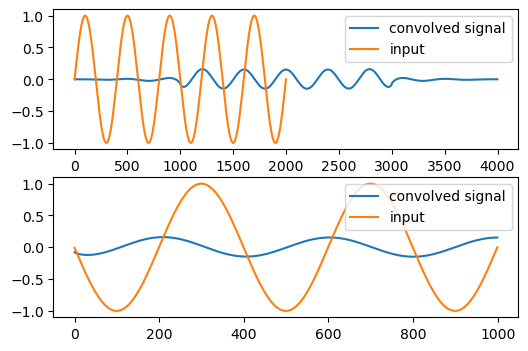

In [4]:
signal=[]
for i in range(0,math.floor(len(h)/2)):
 signal.append(np.convolve(x,h[i]))
 plt.figure(figsize=(6, 4))
 plt.subplot(2,1,1)
 plt.plot(signal[i],label='convolved signal')
 plt.plot(x,label='input')
 plt.legend()
 plt.subplot(2,1,2)
 plt.plot(signal[i][1000:2000],label='convolved signal')
 plt.plot(x[1000:2000],label='input')
 plt.legend()
 plt.show()

In [5]:
import wave

# Loading The Audio and taking the first 100000 samples

In [6]:
n=100000
sara=wave.open('sara.wav','rb')
channels=sara.getnchannels()
samples=sara.getnframes()
framerate=sara.getframerate()
sampwidth=sara.getsampwidth()
all=sara.getparams()
sample_data=sara.readframes(n)
sara.close()

print(samples)

new_sara=wave.open('Sampled_sara.wav','wb')
new_sara.setnchannels(channels)
new_sara.setframerate(framerate)
new_sara.setsampwidth(sampwidth)

new_sara.writeframes(sample_data)

new_sara.close()

1091712


In [7]:
wave_obj=wave.open('Sampled_sara.wav','rb')
new_samples=wave_obj.getnframes()
print(new_samples)
wave_obj.close()

100000


# Convolution of Speech Signal with Filtering Signal

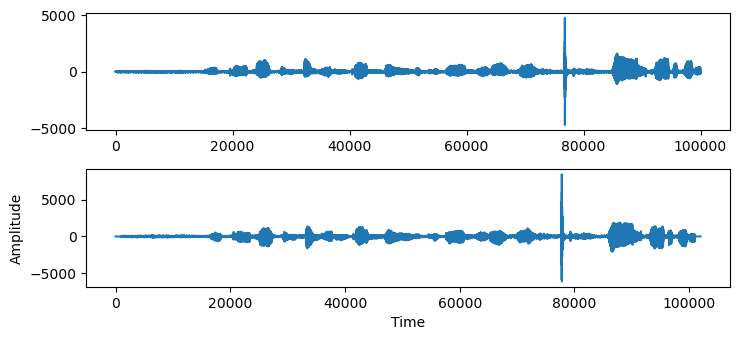

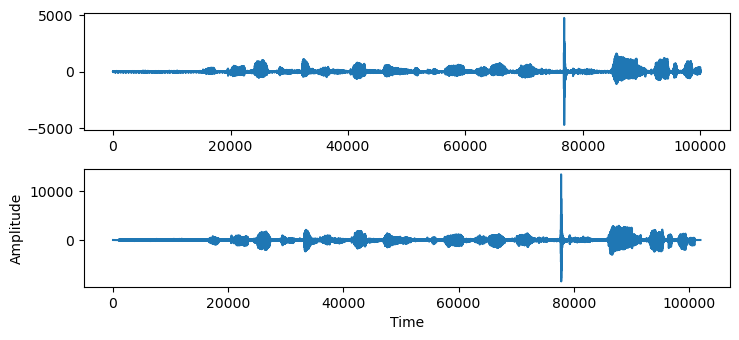

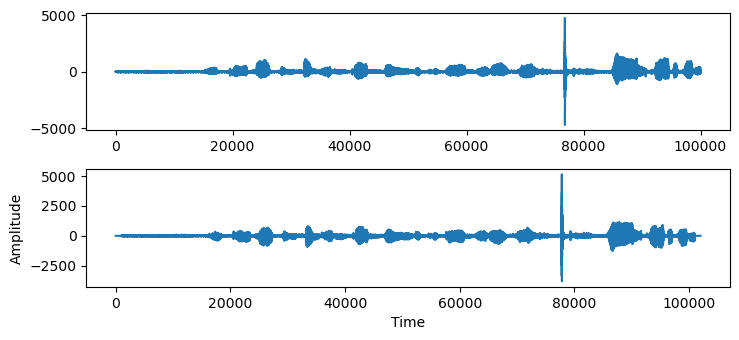

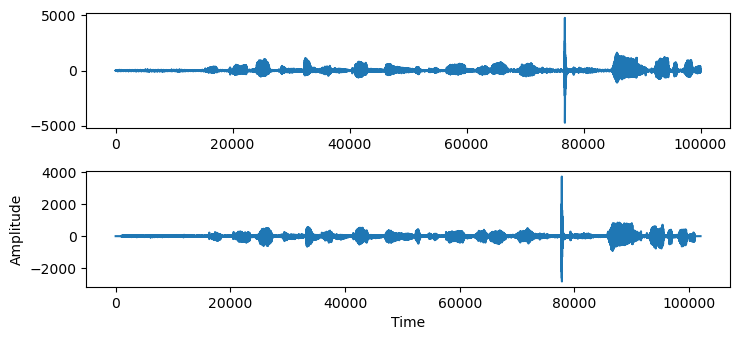

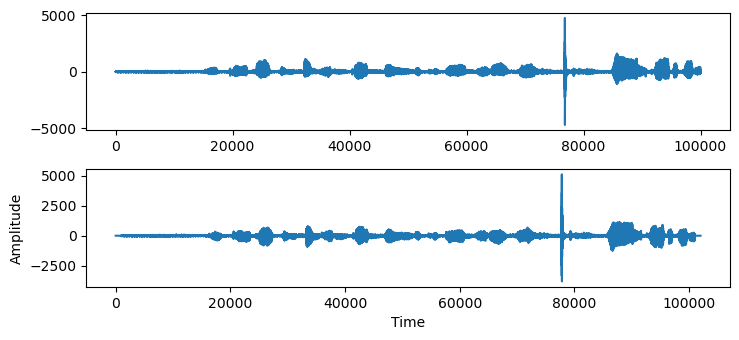

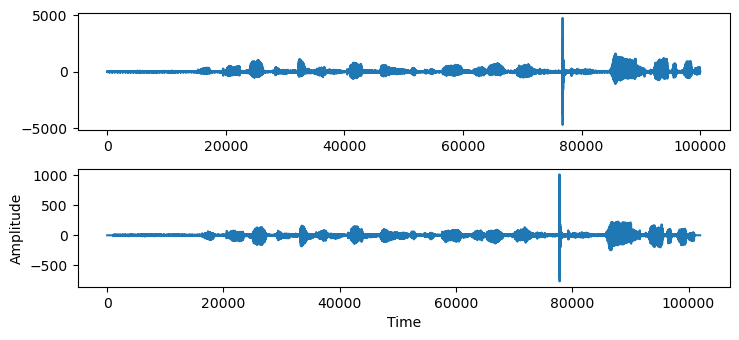

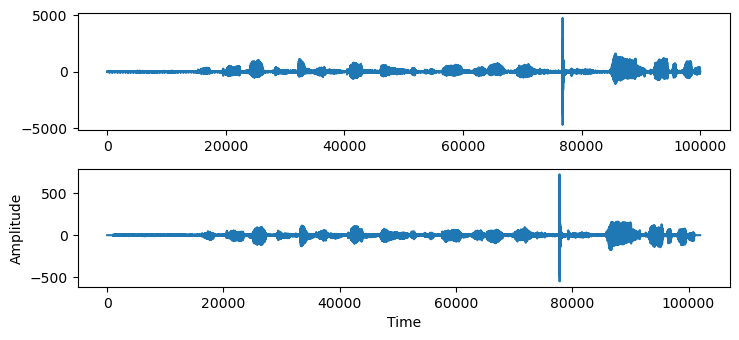

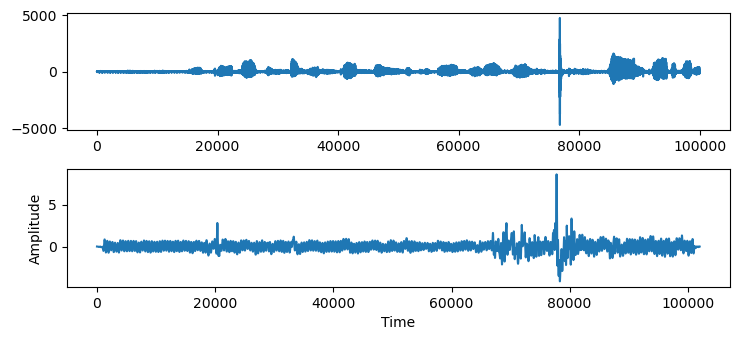

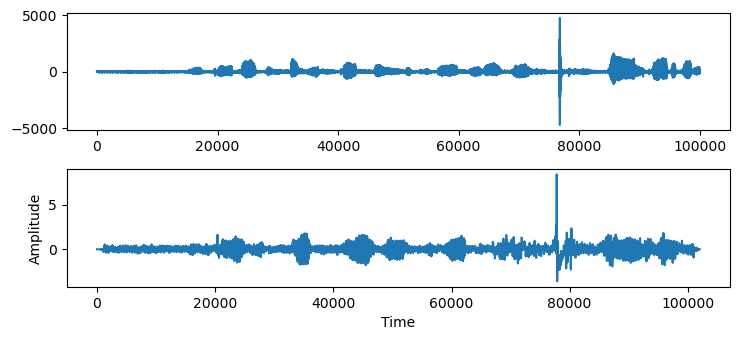

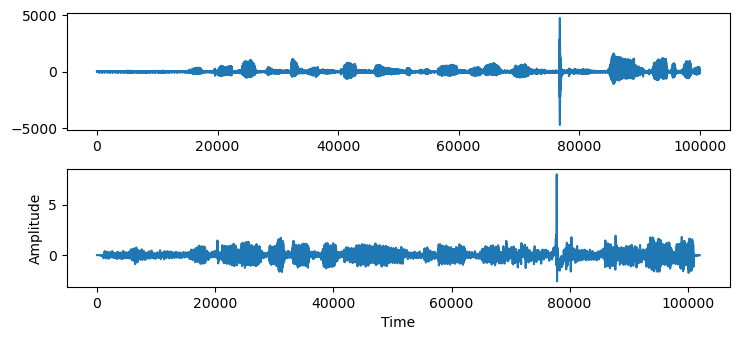

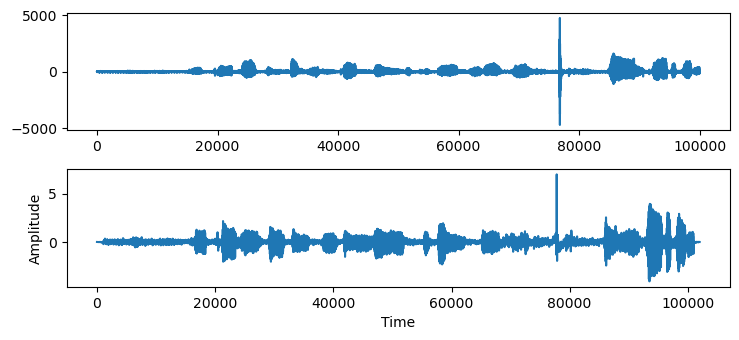

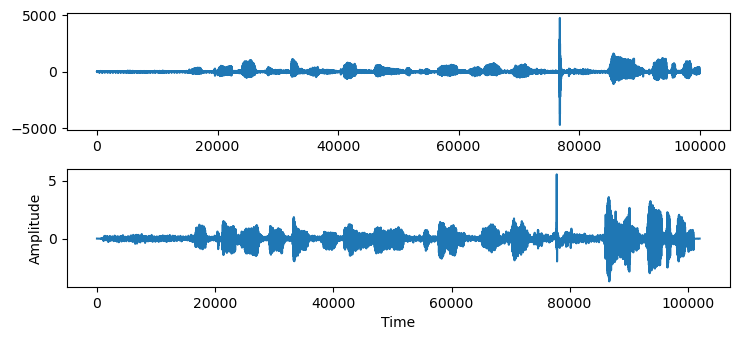

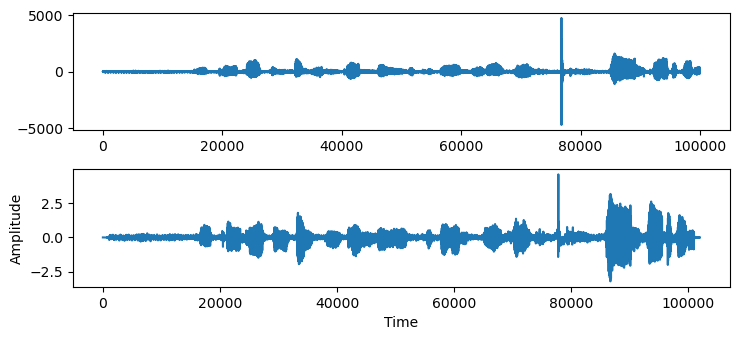

In [8]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
cov=[]
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
input_data = read("Sampled_sara.wav")
audio = input_data[1]
for i in range(len(h)):
 cov.append(np.convolve(audio,h[i]))
 plt.subplot(211)
 plt.plot(audio)
 plt.subplot(212)
 plt.plot(cov[i])
 plt.ylabel("Amplitude")
 plt.xlabel("Time")
 plt.show()

# The highest frequency is chosen as it yields best high pass filtering

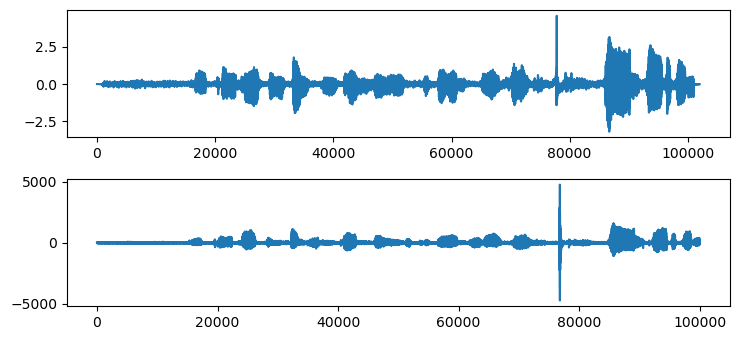

In [9]:
from scipy.io.wavfile import write
convolved=write("convolv_audio.wav", framerate, cov[len(cov)-1].astype(np.float32))

data=read('convolv_audio.wav')
plt.subplot(2,1,1)
plt.plot(data[1])
plt.subplot(2,1,2)
plt.plot(audio)




# Plotting Spectogram

In [ ]:
from scikits.audiolab import wavread
from pylab import *

signal, fs, enc = wavread('convolv_audio.wav')
specgram(signal)
show()

In [ ]:
from scipy import *
from pylab import *
def spect(x):
	A=fft(x, 15*len(x))
	mag=abs(fftshift(A))
	omega = np.linspace(-pi, pi, len(A))
	response = 20*log10(mag)
	return [omega,response]
imp=spect(data[1])
plt.plot(imp)
